In [1]:
import sys
sys.path.append("/Users/dunzhiling/Documents/Research/Program/Python/PointChargeFit/arXivProgram/")
import PointChargeCEF_Oct2020 as CEF
import os
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True, linewidth=100)

## Converlute experimental data based on: https://journals.aps.org/prb/abstract/10.1103/PhysRevB.97.024415

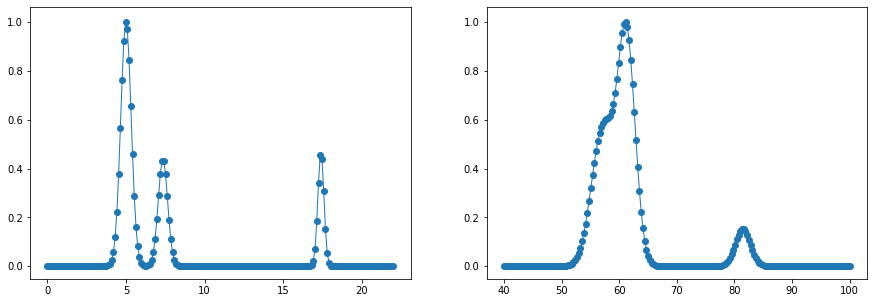

In [61]:
Nlevels=15
N_transitions=7

# #Er2Ge2O7 data converluted in Lorentz peak#
Energy= (np.array([ 6.6, 9.3, 20.2, 69.2, 71.1, 75.8, 95.3]) + np.array([ 6.5, 9.1, 20.3, 69.2, 70.8, 75.6, 95.3]))/2
Intensity=(np.array([ 1, 0.65, 0.20, 0.04, 0.04, 0.1, 0.015]) +  np.array([ 1, 0.57, 0.24, 0.04, 0.04, 0.14, 0.03]))/2

#Er2Ti2O7 data converluted in Lorentz peak#
Energy= (np.array([ 6.3, 7.3, 15.7, 60.2, 62.3, 66.3, 87.2]) + np.array([ 6.4, 7.3, 15.7, 60.6, 62, 65.9, 86.7]))/2
Intensity=(np.array([ 1, 0.75, 0.2, 0.04, 0.04, 0.09, 0.01]) +  np.array([ 1, 0.88, 0.3, 0.07, 0.05, 0.13, 0.04]))/2

# #Er2Pt2O7 data converluted in Lorentz peak#
Energy=(np.array([ 5.5, 9.5, 21.2,  64.1, 65.6, 68.8, 88.7]) + np.array([ 5.7, 9.1, 21.3,  63.7, 65.1, 69.5, 88.7]))/2
Intensity=(np.array([ 1, 0.29, 0.21, 0.04, 0.06, 0.12, 0.01]) + np.array([ 1, 0.33, 0.28, 0.03, 0.06, 0.16, 0.02]))/2

# #Er2Sn2O7 data converluted in Lorentz peak#
Energy=0.5*np.array([ 5.0, 7.4, 17.3, 55.9, 57.9, 61.2, 81.8]) + 0.5*np.array([ 5.0, 7.3, 17.5, 55.8, 57.5, 61.2, 81.1])
Intensity=0.5*np.array([ 1, 0.36, 0.24, 0.04, 0.06, 0.1, 0.02]) + 0.5*np.array([ 1, 0.43, 0.3, 0.04, 0.07, 0.2, 0.02])

N_point = 200
FWHM=0


Ei=25
E1=0
E2=22
x1 = np.linspace(E1, E2, N_point)
y1 = np.linspace(0, 0, N_point)
error1= np.linspace(0, 0, N_point)

for i in range(N_transitions):
    Convolution = np.linspace(0, 0, N_point)
    FWHM_G = CEF.Instrument_resolution(Energy[i], Ei)
    for k in range(N_point):
        Convolution[k]=CEF.Voigt(x1[k] - Energy[i], FWHM_G, FWHM)
    y1 = y1 + Intensity[i] * Convolution
y1 = y1 / max(y1)
error1=y1*0.01+1e-3

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.errorbar(x1, y1,  yerr=error1,  marker='o',  linewidth=1.0)

Ei=150
E1=40
E2=100
x2 = np.linspace(E1, E2, N_point)
y2 = np.linspace(0, 0, N_point)
error2= np.linspace(0, 0, N_point)
for i in range(N_transitions):
    Convolution = np.linspace(0, 0, N_point)
    FWHM_G = CEF.Instrument_resolution(Energy[i], Ei)
    for k in range(N_point):
        Convolution[k]=CEF.Voigt(x2[k] - Energy[i], FWHM_G, FWHM)
    y2 = y2 + Intensity[i] * Convolution
y2 = y2 / max(y2)
error2=y2*0.01 + 1e-3
plt.subplot(1,2,2)
plt.errorbar(x2, y2,  yerr=error2, marker='o', linewidth=1.0)
plt.yscale('linear')
#plt.ylim(0, 0.1)
plt.show()



In [62]:
File1="Exp_Er2Sn2O7_25meV.dat"
File2="Exp_Er2Sn2O7_150meV.dat"

with open(File1, 'w') as f:
    print('E(meV)   Intensity   Error', file=f)
    for i in range(N_point):
        print("{0:5.1f}".format(x1[i]),'  ', "{0:8.5f}".format(y1[i]), '  ', "{0:8.5f}".format(error1[i]),  file=f)
f.close()
with open(File2, 'w') as f:
    print('E(meV)   Intensity   Error', file=f)
    for i in range(N_point):
        print("{0:5.1f}".format(x2[i]),'  ', "{0:8.5f}".format(y2[i]), '  ', "{0:8.5f}".format(error2[i]),  file=f)
f.close()

## Er$_2$Ge$_2$O$_7$

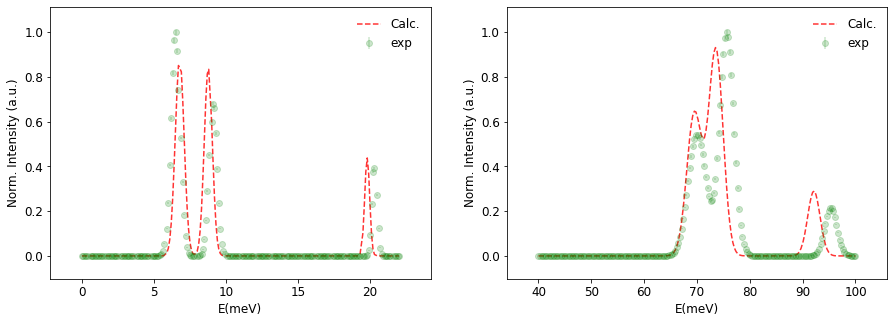

In [7]:
EGO=CEF.CEFmodel('Er3+')
EGO.levels_obs=[0,0, 6.6, 6.6, 9.3, 9.3, 20.2, 20.2, 69.2, 69.2, 71.1, 71.1, 75.8, 75.8, 95.3, 95.3]
EGO.addINSdata(np.loadtxt("Exp_Er2Ge2O7_25meV.dat", skiprows=1), Temperature=4, Ei=25)   #INS data
EGO.addINSdata(np.loadtxt("Exp_Er2Ge2O7_150meV.dat", skiprows=1), Temperature=4, Ei=150)   #INS data

EGO.PC_variable = 'R1', 'R2', 'Theta', 'q1', 'q2'
EGO.clearPC()
EGO.addPC('R1, 0, 0, q1')
EGO.addPC('R1, 180, 0, q1')
EGO.addPC('R2,     Theta,  60, q2')
EGO.addPC('R2,     Theta, 180, q2')
EGO.addPC('R2,     Theta, 300, q2')
EGO.addPC('R2, 180-Theta,   0, q2')
EGO.addPC('R2, 180-Theta, 120, q2')
EGO.addPC('R2, 180-Theta, 240, q2')



EGO.PC_value_ini=np.array([1.57, 1.55, 81, 0.55, 0.35])
EGO.FWHM=0.0

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
EGO.Evaluate_pattern(dataset = 0, Plotcontrol=True, UsePCini=True);
plt.subplot(1,2,2)
EGO.Evaluate_pattern(dataset = 1, Plotcontrol=True, UsePCini=True);


Function 140 evaluated, Chi2_energy =    0.1482 ,  Chi2 =    2.4675                                                                                
 PC variables = [ 1.5678  1.5456 82.0988  0.5689  0.35  ]
Eigen-enegies= [ 0.      0.      6.5633  6.5633  9.0932  9.0932 20.3442 20.3442 70.0037 70.0037 70.1249 70.1249
 74.0576 74.0576 94.6559 94.6559]
(q1/r1)/(q2/r2) = 1.602474891666551
 Rotational matrix =  
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]] 
 Rotation angle = 1.3679517275317012e-14 

g_diagnal =  
 [[-6.3529  0.      0.    ]
 [ 0.     -6.3529  0.    ]
 [ 0.      0.     -3.8313]]


/usr/local/Cellar/jupyterlab/2.2.6/libexec/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


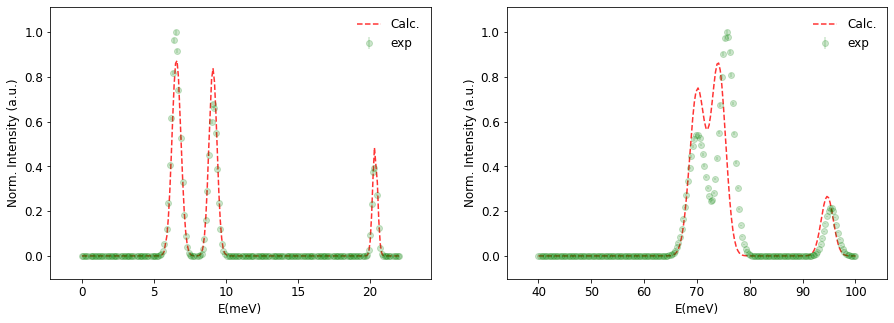

In [8]:
# Start Point Charge fit
EGO.PCfit(Fit_variable=['R1', 'R2', 'Theta', 'q1', 'q2'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
EGO.Evaluate_pattern(dataset = 0, Plotcontrol=True)
plt.subplot(1,2,2)
EGO.Evaluate_pattern(dataset = 1, Plotcontrol=True)

EGO.diagonalG();
print('\n PC variables =',EGO.PC_value)
print('Eigen-enegies=',EGO.eigenval)
print('(q1/r1)/(q2/r2) =', (EGO.PC_value[3]/EGO.PC_value[0])/(EGO.PC_value[4]/EGO.PC_value[1]))

In [9]:
EGO.writefile("PCFit_Er2Ge2O7.dat")

## Er$_2$Ti$_2$O$_7$

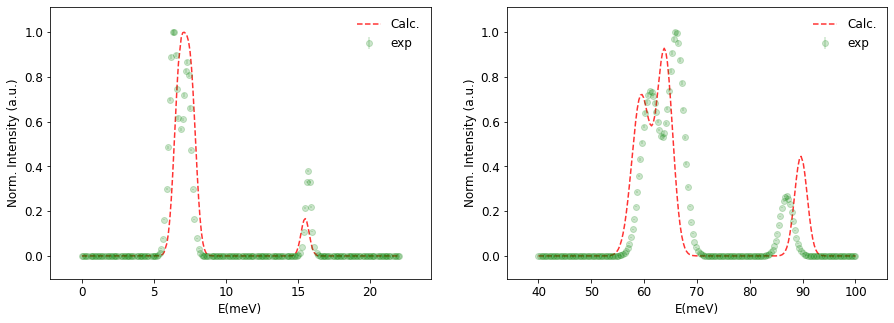

In [27]:
ETO=CEF.CEFmodel('Er3+')
ETO.levels_obs=[0,0, 6.4, 6.4, 7.3, 7.3, 15.7, 15.7, 60.2, 60.2, 62.3, 62.3, 66.3, 66.3, 87.2, 87.2]
ETO.addINSdata(np.loadtxt("Exp_Er2Ti2O7_25meV.dat", skiprows=1), Temperature=4, Ei=30)   #INS data
ETO.addINSdata(np.loadtxt("Exp_Er2Ti2O7_150meV.dat", skiprows=1), Temperature=4, Ei=150)   #INS data

ETO.PC_variable = 'R1', 'R2', 'Theta', 'q1', 'q2'
ETO.clearPC()
ETO.addPC('R1, 0, 0, q1')
ETO.addPC('R1, 180, 0, q1')
ETO.addPC('R2, 180-Theta,   0, q2')
ETO.addPC('R2,     Theta,  60, q2')
ETO.addPC('R2, 180-Theta, 120, q2')
ETO.addPC('R2,     Theta, 180, q2')
ETO.addPC('R2, 180-Theta, 240, q2')
ETO.addPC('R2,     Theta, 300, q2')


ETO.PC_value_ini=np.array([1.62, 1.66, 78.8, 0.65, 0.45])
ETO.FWHM=0

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ETO.Evaluate_pattern(dataset = 0, Plotcontrol=True, UsePCini=True);
plt.subplot(1,2,2)
ETO.Evaluate_pattern(dataset = 1, Plotcontrol=True, UsePCini=True);

 Rotational matrix =  , Chi2_energy =    0.0984 ,  Chi2 =    2.5067                                                                                
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]] 
 Rotation angle = 7.133868573019129e-14 

g_diagnal =  
 [[ 6.4911862  0.        -0.       ]
 [ 0.         6.4911862  0.       ]
 [ 0.         0.        -2.9218774]]


/usr/local/Cellar/jupyterlab/2.2.6/libexec/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



 PC variables = [ 1.6270183  1.6557384 78.787763   0.6465685  0.4610533]
Eigen-enegies= [ 0.         0.         6.6967156  6.6967156  7.2230259  7.2230259 15.5748213 15.5748213 61.500276
 61.500276  62.2648941 62.2648941 65.6673726 65.6673726 86.9644105 86.9644105]
(q1/r1)/(q2/r2) = 1.4271271627612596


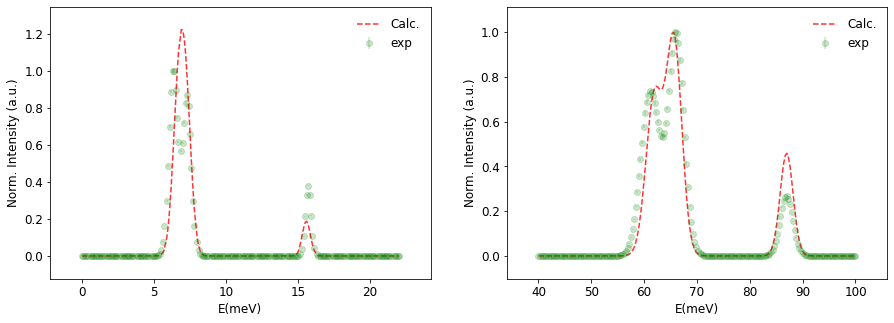

In [13]:
# Start Point Charge fit
ETO.PCfit(Fit_variable=['R1', 'R2', 'Theta', 'q1', 'q2'])


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ETO.Evaluate_pattern(dataset = 0, Plotcontrol=True);
plt.subplot(1,2,2)
ETO.Evaluate_pattern(dataset = 1, Plotcontrol=True);


print('\n PC variables =',ETO.PC_value)
print('Eigen-enegies=',ETO.eigenval)
print('(q1/r1)/(q2/r2) =', (ETO.PC_value[3]/ETO.PC_value[0])/(ETO.PC_value[4]/ETO.PC_value[1]))
ETO.diagonalG();

In [14]:
ETO.writefile("PCFit_Er2Ti2O7.dat")

/usr/local/Cellar/jupyterlab/2.2.6/libexec/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


### Steven Operator fit

array([[  2.       ,   0.       ,  28.7523857],
       [  4.       ,   0.       ,  39.5988515],
       [  4.       ,   3.       , 357.6619907],
       [  6.       ,   0.       ,   5.8400309],
       [  6.       ,   3.       , -79.8329846],
       [  6.       ,   6.       ,  96.2534107]])

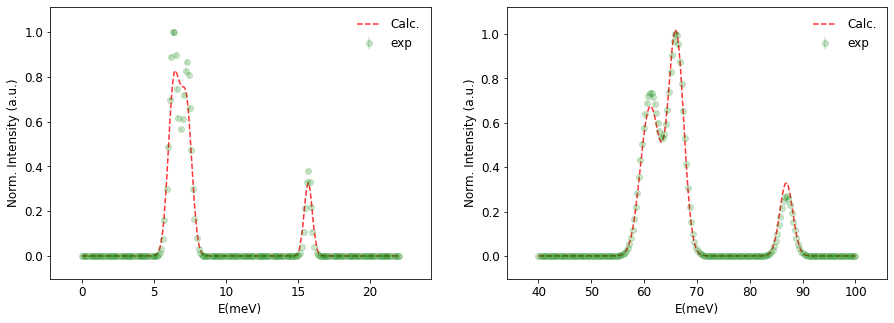

In [53]:
ETO.readBkq("Er2Ti2O7_StevenOp.dat",printcontol=True)

ETO.StevenOpfit(TargetChi2energy=0.02)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ETO.Evaluate_pattern(dataset = 0, Plotcontrol=True);
plt.subplot(1,2,2)
ETO.Evaluate_pattern(dataset = 1, Plotcontrol=True);

CEF.BkqtoAkq(ETO.Bkq,'Er3+')

## Er$_2$Pt$_2$O$_7$


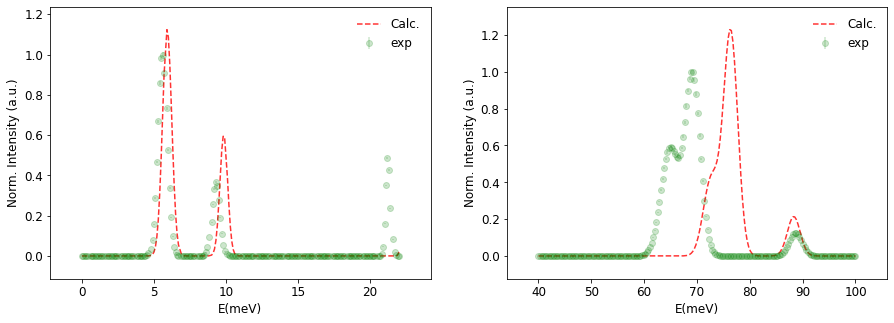

In [6]:
EPO=CEF.CEFmodel('Er3+') 
EPO.levels_obs=[0, 0, 5.5, 5.5, 9.5,  9.5, 21.2, 21.2, 64.1, 64.1, 65.6,  65.6, 68.8, 68.8, 88.7, 88.7]
EPO.addINSdata(np.loadtxt("Exp_Er2Pt2O7_25meV.dat", skiprows=1), Temperature=4, Ei=25)   #INS data
EPO.addINSdata(np.loadtxt("Exp_Er2Pt2O7_150meV.dat", skiprows=1), Temperature=4, Ei=150)   #INS data

EPO.PC_variable = 'R1', 'R2', 'Theta', 'q1', 'q2'
EPO.clearPC()
EPO.addPC('R1, 0, 0, q1')
EPO.addPC('R1, 180, 0, q1')
EPO.addPC('R2, 180-Theta,   0, q2')
EPO.addPC('R2,     Theta,  60, q2')
EPO.addPC('R2, 180-Theta, 120, q2')
EPO.addPC('R2,     Theta, 180, q2')
EPO.addPC('R2, 180-Theta, 240, q2')
EPO.addPC('R2,     Theta, 300, q2')

EPO.PC_value_ini=np.array([1.58, 1.5, 80, 0.5, 0.3])
EPO.FWHM=0

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
EPO.Evaluate_pattern(dataset = 0, Plotcontrol=True, UsePCini=True);
plt.subplot(1,2,2)
EPO.Evaluate_pattern(dataset = 1, Plotcontrol=True, UsePCini=True);


 Rotational matrix =  , Chi2_energy =    0.0731 ,  Chi2 =    1.8991                                                                                
 [[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]] 
 Rotation angle = -1.751149286707602e-13 

g_diagnal =  
 [[ 7.7639  0.     -0.    ]
 [ 0.      7.7639  0.    ]
 [ 0.      0.      0.9796]]

 PC variables = [ 1.6029  1.5141 79.5837  0.5399  0.2849]
Eigen-enegies= [ 0.      0.      5.7312  5.7312  9.1624  9.1624 21.3024 21.3024 64.901  64.901  65.2321 65.2321
 68.6994 68.6994 88.2596 88.2596]
(q1/r1)/(q2/r2) = 1.7895859267541225


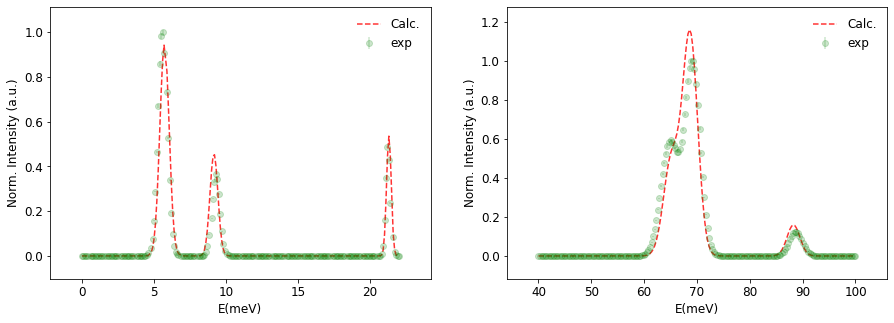

In [7]:
# Start Point Charge fit
min=EPO.PCfit(Fit_variable=['R1', 'R2', 'Theta', 'q1', 'q2'])

EPO.diagonalG()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
EPO.Evaluate_pattern(dataset = 0, Plotcontrol=True);
plt.subplot(1,2,2)
EPO.Evaluate_pattern(dataset = 1, Plotcontrol=True);

print('\n PC variables =',EPO.PC_value)
print('Eigen-enegies=',EPO.eigenval)
print('(q1/r1)/(q2/r2) =', (EPO.PC_value[3]/EPO.PC_value[0])/(EPO.PC_value[4]/EPO.PC_value[1]))

In [8]:
EPO.writefile("PCFit_Er2Pt2O7.dat")

## Er$_2$Sn$_2$O$_7$


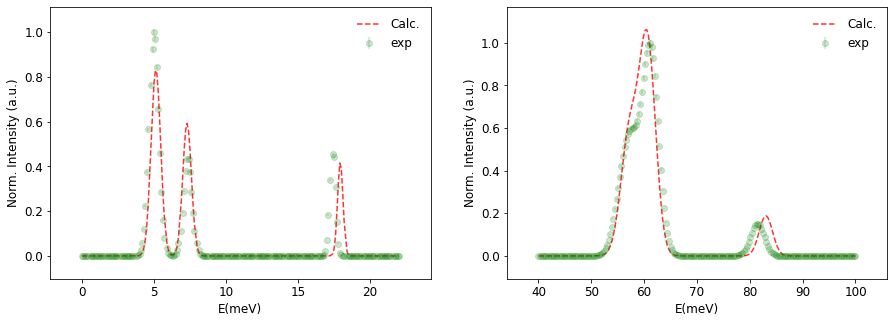

In [66]:
ESO=CEF.CEFmodel('Er3+') 
ESO.levels_obs=[0, 0, 5.0, 5.0, 7.3,  7.3,  17.5, 17.5, 55.8, 55.8, 57.5,  57.5, 61.2, 61.2, 81.1, 81.1]
ESO.addINSdata(np.loadtxt("Exp_Er2Sn2O7_25meV.dat",  skiprows=1), Temperature=4, Ei=25)   #INS data
ESO.addINSdata(np.loadtxt("Exp_Er2Sn2O7_150meV.dat", skiprows=1), Temperature=4, Ei=150)   #INS data

ESO.PC_variable = 'R1', 'R2', 'Theta', 'q1', 'q2'
ESO.clearPC()
ESO.addPC('R1, 0, 0, q1')
ESO.addPC('R1, 180, 0, q1')
ESO.addPC('R2, 180-Theta,   0, q2')
ESO.addPC('R2,     Theta,  60, q2')
ESO.addPC('R2, 180-Theta, 120, q2')
ESO.addPC('R2,     Theta, 180, q2')
ESO.addPC('R2, 180-Theta, 240, q2')
ESO.addPC('R2,     Theta, 300, q2')

ESO.PC_value_ini=np.array([1.611, 1.556, 80.3, 0.55, 0.3])
ESO.FWHM=0

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ESO.Evaluate_pattern(dataset = 0, Plotcontrol=True, UsePCini=True);
plt.subplot(1,2,2)
ESO.Evaluate_pattern(dataset = 1, Plotcontrol=True, UsePCini=True);

Function 174 evaluated, Chi2_energy =    0.0780 ,  Chi2 =    2.2801                                                                                
 PC variables = [ 1.6079  1.5576 80.2281  0.535   0.3016]
Eigen-enegies= [ 0.      0.      5.1753  5.1753  7.2237  7.2237 17.5223 17.5223 57.0425 57.0425 57.5764 57.5764
 60.673  60.673  81.2985 81.2985]
(q1/r1)/(q2/r2) = 1.7184501685475684
 Rotational matrix =  
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]] 
 Rotation angle = 3.2332435554384064e-14 

g_diagnal =  
 [[-7.1552  0.     -0.    ]
 [ 0.      7.1552  0.    ]
 [-0.      0.      1.2036]]


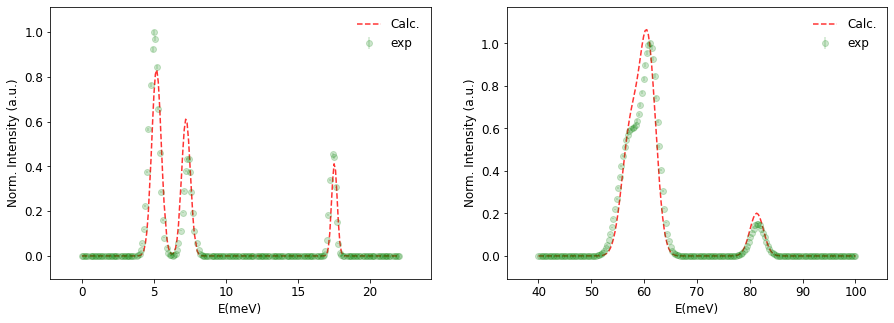

In [67]:
# Start Point Charge fit
min=ESO.PCfit(Fit_variable=['R1', 'R2', 'Theta', 'q1', 'q2'],)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ESO.Evaluate_pattern(dataset = 0, Plotcontrol=True);
plt.subplot(1,2,2)
ESO.Evaluate_pattern(dataset = 1, Plotcontrol=True);

print('\n PC variables =',ESO.PC_value)
print('Eigen-enegies=',ESO.eigenval)
print('(q1/r1)/(q2/r2) =', (ESO.PC_value[3]/ESO.PC_value[0])/(ESO.PC_value[4]/ESO.PC_value[1]))
ESO.diagonalG();


In [68]:
ESO.writefile("PCFit_Er2Sn2O7.dat")